<a href="https://colab.research.google.com/github/BudiAtu/Apriori/blob/main/apriori.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center> <h1 style="background-color:seagreen; color:white" >Algoritma Apriori</h1> 

 

<a id='libraries'></a>
<h1 style="color:forestgreen" >Aturan Asosiasi? Apa itu!</h1> 

Pembelajaran aturan asosiasi adalah metode pembelajaran mesin berbasis aturan untuk menemukan hubungan menarik antara variabel dalam database besar. Hal ini dimaksudkan untuk mengidentifikasi aturan kuat yang ditemukan dalam database menggunakan beberapa ukuran ketertarikan.

Berdasarkan konsep aturan yang kuat, Rakesh Agrawal, Tomasz Imieliński dan Arun Swam memperkenalkan aturan asosiasi untuk menemukan keteraturan antar produk dalam data transaksi skala besar yang direkam oleh sistem point-of-sale (POS) di supermarket. Misalnya, aturan {onions,potatoes} ->{burger} yang ditemukan dalam data penjualan supermarket akan menunjukkan bahwa jika pelanggan membeli bawang dan kentang bersama-sama, mereka kemungkinan juga akan membeli daging hamburger. Informasi tersebut dapat digunakan sebagai dasar untuk keputusan tentang kegiatan pemasaran seperti, misalnya, harga promosi atau penempatan produk.

Selain contoh di atas dari aturan asosiasi analisis keranjang pasar yang digunakan saat ini di banyak area aplikasi termasuk penambangan penggunaan Web, deteksi intrusi, produksi berkelanjutan, dan bioinformatika. Berbeda dengan penambangan urutan, pembelajaran aturan asosiasi biasanya tidak mempertimbangkan urutan item baik dalam transaksi atau lintas transaksi.
Pertama-tama, kita perlu mengetahui beberapa istilah tentang Aturan Asosiasi.

- **Support:** Support adalah indikasi seberapa sering itemset muncul di dataset.

Dukungan adalah apa yang disebut batasan frekuensi. Fitur utamanya adalah ia memiliki properti penutupan ke bawah yang berarti bahwa semua subset dari set yang sering (dukungan > ambang batas dukungan minimum) juga sering. Properti ini (sebenarnya, fakta bahwa tidak ada super set dari set yang jarang dapat menjadi sering) digunakan untuk memangkas ruang pencarian (biasanya pohon set item dengan ukuran yang meningkat) dalam algoritme level-bijaksana (misalnya, algoritme APRIORI). Kekurangan dari support adalah masalah rare item. Item yang sangat jarang muncul dalam kumpulan data dipangkas meskipun masih akan menghasilkan aturan yang menarik dan berpotensi berharga.

**Confidence:** Confidence adalah indikasi seberapa sering aturan terbukti benar.

Confidence tidak tertutup ke bawah dan dikembangkan bersama dengan dukungan (yang disebut kerangka dukungan-kepercayaan). Sementara dukungan digunakan untuk memangkas ruang pencarian dan hanya meninggalkan aturan yang berpotensi menarik, kepercayaan digunakan pada langkah kedua untuk menyaring aturan yang melebihi min. ambang kepercayaan. Masalah dengan Confidence adalah sensitif terhadap frekuensi konsekuen (Y) dalam kumpulan data. Disebabkan oleh cara menghitung kepercayaan, Y dengan dukungan yang lebih tinggi akan secara otomatis menghasilkan nilai kepercayaan yang lebih tinggi bahkan jika tidak ada hubungan antara item.

- **Lift:** Rasio support yang diamati dengan yang diharapkan jika X dan Y independen.

- **Lift:** Rasio support yang diamati dengan yang diharapkan jika X dan Y independen.

Leverage mengukur perbedaan X dan Y yang muncul bersama dalam kumpulan data dan apa yang diharapkan jika X dan Y bergantung secara statistik. Rasional dalam pengaturan penjualan adalah untuk mengetahui berapa banyak lagi unit (barang X dan Y bersama-sama) yang terjual daripada yang diharapkan dari penjualan independen. Menggunakan min. ambang leverage pada saat yang sama menggabungkan batasan frekuensi implisit. Misalnya, untuk menyetel min. ambang leverage hingga 0,01% (sesuai dengan 10 kejadian dalam kumpulan data dengan 100.000 transaksi) yang pertama dapat menggunakan algoritme untuk menemukan semua kumpulan item dengan min. dukungan 0,01% dan kemudian menyaring set item yang ditemukan menggunakan batasan leverage. Karena leverage properti ini juga dapat mengalami masalah item langka.

- **Conviction:** Rasio frekuensi yang diharapkan bahwa X terjadi tanpa Y (yaitu, frekuensi aturan membuat prediksi yang salah) jika X dan Y independen dibagi dengan frekuensi yang diamati dari prediksi yang salah.

Conviction membandingkan probabilitas bahwa X muncul tanpa Y jika mereka bergantung dengan frekuensi sebenarnya dari kemunculan X tanpa Y. Dalam hal itu mirip dengan peningkatan (lihat bagian tentang peningkatan di halaman ini), namun, kontras dengan mengangkatnya merupakan tindakan terarah. Selanjutnya, keyakinan monoton dalam kepercayaan dan angkat.

- **Leverage:** Leverage mengukur perbedaan X dan Y yang muncul bersama dalam kumpulan data dan apa yang diharapkan jika X dan Y bergantung secara statistik.

Rasional dalam pengaturan penjualan adalah untuk mengetahui berapa banyak lagi unit (barang X dan Y bersama-sama) yang terjual daripada yang diharapkan dari penjualan independen. Menggunakan min. ambang leverage pada saat yang sama menggabungkan batasan frekuensi implisit. Misalnya, untuk menyetel min. ambang leverage hingga 0,01% (sesuai dengan 10 kejadian dalam kumpulan data dengan 100.000 transaksi) yang pertama dapat menggunakan algoritme untuk menemukan semua kumpulan item dengan min. dukungan 0,01% dan kemudian menyaring set item yang ditemukan menggunakan batasan leverage. Karena leverage properti ini juga dapat mengalami masalah item langka.



<a id='libraries'></a>
<h1 style="color:forestgreen" >1. Packages</h1> 

In [ ]:
# ----------------------------
# BASE
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

# ----------------------------
# INSTALL
# !pip install mlxtend

# ----------------------------
# TRANSACTION ENCODER
from mlxtend.preprocessing import TransactionEncoder

# ----------------------------
# APRIORI FUNCTION 
from mlxtend.frequent_patterns import apriori, association_rules

# ----------------------------
# ITERTOOLS 
import itertools

# ----------------------------
# CONFIGURATION
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:.2f}'.format

<a id='load'></a>
<h1 style="color:forestgreen" >2. Data</h1> 

In [ ]:
# Loading the Data
df= pd.read_excel('/content/tiket1.xlsx')
df.head(20)

,Tanggal,ID Transaksi,Items
0,2022-04-01,PJ0002,"Serayu,Argo Sindoro Tambahan,Argo Parahyangan ..."
1,2022-04-02,PJ0003,"Argo Muria,Kutojaya Utara,Argo Parahyangan Pri..."
2,2022-04-03,PJ0004,"Matarmaja,Airlangga,Jayabaya,Singasari,Serayu,..."
3,2022-04-04,PJ0004,"Singasari,Senja Utama,Bengawan,Argo Parahyanga..."
4,2022-04-05,PJ0006,"Gaya Baru Malam Selatan,Argo Cheribon,Kutojaya..."
5,2022-04-06,PJ0007,"Progo,Gumarang,Brantas,Kertajaya,Matarmaja,Arg..."
6,2022-04-07,PJ0008,"Singasari,Argo Muria,Tegal Bahari,Jayabaya,Ben..."
7,2022-04-08,PJ0008,"Matarmaja,Kutojaya Utara,Purwojaya,Gaya Baru M..."
8,2022-04-09,PJ0010,"Tegal Bahari,Jayakarta,Argo Muria,Tegal Bahari..."
9,2022-04-10,PJ0011,"Bengawan,Argo Parahyangan Tambahan,Progo,Senja..."


In [ ]:
# MELIHAT JUMLAH DATA
df.shape

(106, 3)

<a id='tidydata'></a>
<h1 style="color:forestgreen" >3. Data Rapi untuk Asosiasi Rules</h1> 

In [ ]:
data = list(df["Items"].apply(lambda x:x.split(',')))

from mlxtend.preprocessing import TransactionEncoder
te = TransactionEncoder()
te_data = te.fit(data).transform(data)
df = pd.DataFrame(te_data,columns=te.columns_).astype(int)

df

,Airlangga,Argo Cheribon,Argo Muria,Argo Parahyangan Priority,Argo Parahyangan Tambahan,Argo Sindoro Tambahan,Bengawan,Brantas,Cikuray,Gaya Baru Malam Selatan,Gumarang,Jayabaya,Jayakarta,Kertajaya,Kutojaya Utara,Mataram,Matarmaja,Progo,Purwojaya,Sawunggalih,Senja Utama,Senja Utama Solo,Serayu,Singasari,Tawang Jaya Prenium,Tegal Bahari
0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,1,0,1,0,1,1,0,0
3,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0
4,1,1,0,0,0,0,0,0,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,1,1,0,0,1,0
102,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,1,0,0
103,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
104,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0


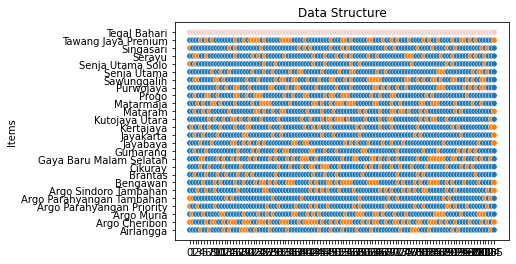

In [ ]:
p = df.copy()
for i in range(1, len(p.columns)+1):
    p["Cat"] = np.where(p[p.columns[i]] == 1, 1, 0)
    p[p.columns[i]]= i
    g =sns.scatterplot(p.index, p[p.columns[i]], hue = p.Cat, legend = False)
    g.yaxis.set_label_text('Items')
    g.set_yticks(np.arange(1, len(p.columns)))
    g.set_xticks(df.index)
    g.set_yticklabels(df.columns)
    plt.title("Data Structure")


<a id='step'></a>
<h1 style="color:forestgreen" >4. Step by Step</h1> 


**Iterasi Pertama:** Temukan nilai dukungan untuk setiap produk.

- n: 20 (df.shape[0])

In [ ]:
# Find Frequency of Items
df.sum()

Airlangga                    31
Argo Cheribon                23
Argo Muria                   53
Argo Parahyangan Priority    30
Argo Parahyangan Tambahan    19
Argo Sindoro Tambahan        13
Bengawan                     24
Brantas                      39
Cikuray                      16
Gaya Baru Malam Selatan      24
Gumarang                     37
Jayabaya                     21
Jayakarta                    22
Kertajaya                    14
Kutojaya Utara               22
Mataram                      28
Matarmaja                    26
Progo                        34
Purwojaya                    27
Sawunggalih                  27
Senja Utama                  36
Senja Utama Solo             22
Serayu                       12
Singasari                    24
Tawang Jaya Prenium          18
Tegal Bahari                 34
dtype: int64

Jika kita membagi semua item dengan nomor baris, kita dapat menemukan nilai Support. Nilai ambang batas kami adalah 0,2 untuk nilai Dukungan.

In [ ]:
# Product Frequency / Total Sales
first = pd.DataFrame(df.sum() / df.shape[0], columns = ["Support"]).sort_values("Support", ascending = False)
first

,Support
Argo Muria,0.50
Brantas,0.37
Gumarang,0.35
Senja Utama,0.34
Tegal Bahari,0.32
Progo,0.32
Airlangga,0.29
Argo Parahyangan Priority,0.28
Mataram,0.26
Sawunggalih,0.25


In [ ]:
# Eliminasi berdasarkan Nilai Dukungan
first[first.Support >= 0.20]

,Support
Argo Muria,0.50
Brantas,0.37
Gumarang,0.35
Senja Utama,0.34
Tegal Bahari,0.32
Progo,0.32
Airlangga,0.29
Argo Parahyangan Priority,0.28
Mataram,0.26
Sawunggalih,0.25


**Iterasi Kedua:** Temukan nilai dukungan untuk kombinasi produk pasangan.

In [ ]:
second = list(itertools.combinations(first.index, 2))
second = [list(i) for i in second]
# Sample of combinations
second[:10]

[['Argo Muria', 'Brantas'],
 ['Argo Muria', 'Gumarang'],
 ['Argo Muria', 'Senja Utama'],
 ['Argo Muria', 'Tegal Bahari'],
 ['Argo Muria', 'Progo'],
 ['Argo Muria', 'Airlangga'],
 ['Argo Muria', 'Argo Parahyangan Priority'],
 ['Argo Muria', 'Mataram'],
 ['Argo Muria', 'Sawunggalih'],
 ['Argo Muria', 'Purwojaya']]

In [ ]:
# Menemukan nilai dukungan
value = []
for i in range(0, len(second)):
    temp = df.T.loc[second[i]].sum() 
    temp = len(temp[temp == df.T.loc[second[i]].shape[0]]) / df.shape[0]
    value.append(temp)
# Buat bingkai data           
secondIteration = pd.DataFrame(value, columns = ["Support"])
secondIteration["index"] = [tuple(i) for i in second]
secondIteration['length'] = secondIteration['index'].apply(lambda x:len(x))
secondIteration = secondIteration.set_index("index").sort_values("Support", ascending = False)
# Eliminasi berdasarkan Nilai Dukungan
secondIteration = secondIteration[secondIteration.Support > 0.1]
secondIteration

,Support,length
index,,
"(Argo Muria, Brantas)",0.25,2
"(Argo Muria, Tegal Bahari)",0.20,2
"(Argo Muria, Progo)",0.20,2
"(Gumarang, Airlangga)",0.20,2
"(Argo Muria, Senja Utama)",0.19,2
"(Brantas, Progo)",0.19,2
"(Argo Muria, Tawang Jaya Prenium)",0.17,2
"(Argo Muria, Gumarang)",0.17,2
"(Brantas, Tegal Bahari)",0.17,2


<a id='myfunction'></a>
<h1 style="color:forestgreen" >5.Fungsi</h1> 

paket mlxtend membantu kita untuk menganalisis masalah aturan asosiasi. Dalam konten ini, saya mencoba membuat fungsi saya sendiri untuk aturan asosiasi.

In [ ]:
def ar_iterations(data, num_iter = 1, support_value = 0.1, iterationIndex = None):
    
    # Iterasi Berikutnya
    def ar_calculation(iterationIndex = iterationIndex): 
        # Perhitungan nilai dukungan
        value = []
        for i in range(0, len(iterationIndex)):
            result = data.T.loc[iterationIndex[i]].sum() 
            result = len(result[result == data.T.loc[iterationIndex[i]].shape[0]]) / data.shape[0]
            value.append(result)
        # Hasil ikat
        result = pd.DataFrame(value, columns = ["Support"])
        result["index"] = [tuple(i) for i in iterationIndex]
        result['length'] = result['index'].apply(lambda x:len(x))
        result = result.set_index("index").sort_values("Support", ascending = False)
        # Eliminasi berdasarkan Nilai Dukungan
        result = result[result.Support > support_value]
        return result    
    
    # Iterasi Pertama
    first = pd.DataFrame(df.T.sum(axis = 1) / df.shape[0], columns = ["Support"]).sort_values("Support", ascending = False)
    first = first[first.Support > support_value]
    first["length"] = 1
    
    if num_iter == 1:
        res = first.copy()
        
    # Iterasi Kedua
    elif num_iter == 2:
        
        second = list(itertools.combinations(first.index, 2))
        second = [list(i) for i in second]
        res = ar_calculation(second)
        
    # Semua Iterasi> 2
    else:
        nth = list(itertools.combinations(set(list(itertools.chain(*iterationIndex))), num_iter))
        nth = [list(i) for i in nth]
        res = ar_calculation(nth)
    
    return res

In [ ]:
iteration1 = ar_iterations(df, num_iter=1, support_value=0.1)
iteration1

,Support,length
Argo Muria,0.50,1
Brantas,0.37,1
Gumarang,0.35,1
Senja Utama,0.34,1
Tegal Bahari,0.32,1
Progo,0.32,1
Airlangga,0.29,1
Argo Parahyangan Priority,0.28,1
Mataram,0.26,1
Sawunggalih,0.25,1


In [ ]:
iteration2 = ar_iterations(df, num_iter=2, support_value=0.1)
iteration2

,Support,length
index,,
"(Argo Muria, Brantas)",0.25,2
"(Argo Muria, Tegal Bahari)",0.20,2
"(Argo Muria, Progo)",0.20,2
"(Gumarang, Airlangga)",0.20,2
"(Argo Muria, Senja Utama)",0.19,2
"(Brantas, Progo)",0.19,2
"(Argo Muria, Tawang Jaya Prenium)",0.17,2
"(Argo Muria, Gumarang)",0.17,2
"(Brantas, Tegal Bahari)",0.17,2


In [ ]:
iteration3 = ar_iterations(df, num_iter=3, support_value=0.01,
              iterationIndex=iteration2.index)
iteration3

,Support,length
index,,
"(Argo Muria, Progo, Brantas)",0.15,3
"(Airlangga, Gumarang, Brantas)",0.12,3
"(Tegal Bahari, Argo Muria, Brantas)",0.11,3
"(Argo Muria, Mataram, Brantas)",0.11,3
"(Tegal Bahari, Airlangga, Gumarang)",0.10,3
...,...,...
"(Gumarang, Progo, Matarmaja)",0.02,3
"(Sawunggalih, Senja Utama Solo, Tegal Bahari)",0.02,3
"(Sawunggalih, Senja Utama Solo, Tawang Jaya Prenium)",0.02,3


In [ ]:
iteration4 = ar_iterations(df, num_iter=4, support_value=0.01,
              iterationIndex=iteration3.index)
iteration4

,Support,length
index,,
"(Argo Muria, Mataram, Progo, Brantas)",0.09,4
"(Tegal Bahari, Airlangga, Gumarang, Brantas)",0.08,4
"(Argo Muria, Mataram, Tawang Jaya Prenium, Brantas)",0.08,4
"(Argo Muria, Progo, Senja Utama, Brantas)",0.07,4
"(Sawunggalih, Argo Muria, Progo, Brantas)",0.07,4
...,...,...
"(Gaya Baru Malam Selatan, Tegal Bahari, Airlangga, Argo Cheribon)",0.02,4
"(Bengawan, Airlangga, Progo, Brantas)",0.02,4
"(Gaya Baru Malam Selatan, Argo Parahyangan Tambahan, Mataram, Tawang Jaya Prenium)",0.02,4


<a id='ar'></a>
<h1 style="color:forestgreen" >6. Aturan Asosiasi</h1> 

Ada dua fungsi utama di sini.
- fungsi apriori() mengevaluasi nilai dukungan untuk setiap item.
- fungsi association_rules() membantu kita untuk memahami hubungan antara item anteseden dan konsekuensi. Ini memberikan beberapa informasi yang luar biasa tentang item.

Terutama, variabel "dukungan anteseden", "dukungan konsekuen", "dukungan", "keyakinan" dan "pengangkatan" sangat penting untuk membuat beberapa keputusan bisnis.

In [ ]:
# Apriori
freq_items = apriori(df, min_support = 0.1, use_colnames = True)
freq_items.sort_values("support", ascending = False)

,support,itemsets
2,0.50,(Argo Muria)
7,0.37,(Brantas)
10,0.35,(Gumarang)
20,0.34,(Senja Utama)
25,0.32,(Tegal Bahari)
...,...,...
47,0.10,"(Argo Muria, Senja Utama Solo)"
30,0.10,"(Jayabaya, Airlangga)"
31,0.10,"(Airlangga, Senja Utama)"
64,0.10,"(Progo, Gumarang)"


In [ ]:
freq_items.sort_values("support", ascending = False).head(5)

,support,itemsets
2,0.50,(Argo Muria)
7,0.37,(Brantas)
10,0.35,(Gumarang)
20,0.34,(Senja Utama)
25,0.32,(Tegal Bahari)


In [ ]:
freq_items.sort_values("support", ascending = False).tail(5)

,support,itemsets
47,0.10,"(Argo Muria, Senja Utama Solo)"
30,0.10,"(Jayabaya, Airlangga)"
31,0.10,"(Airlangga, Senja Utama)"
64,0.10,"(Progo, Gumarang)"
87,0.10,"(Mataram, Argo Muria, Progo)"


In [ ]:
# Association Rules & Info
df_ar = association_rules(freq_items, metric = "confidence", min_threshold = 0.5)
df_ar

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Argo Cheribon),(Airlangga),0.22,0.29,0.12,0.57,1.93,0.06,1.63
1,(Airlangga),(Brantas),0.29,0.37,0.16,0.55,1.49,0.05,1.40
2,(Airlangga),(Gumarang),0.29,0.35,0.20,0.68,1.94,0.10,2.02
3,(Gumarang),(Airlangga),0.35,0.29,0.20,0.57,1.94,0.10,1.64
4,(Jayabaya),(Airlangga),0.20,0.29,0.10,0.52,1.79,0.05,1.49
5,(Argo Cheribon),(Gumarang),0.22,0.35,0.11,0.52,1.49,0.04,1.36
6,(Kutojaya Utara),(Argo Cheribon),0.21,0.22,0.10,0.50,2.30,0.06,1.57
7,(Bengawan),(Argo Muria),0.23,0.50,0.12,0.54,1.08,0.01,1.09
8,(Brantas),(Argo Muria),0.37,0.50,0.25,0.67,1.33,0.06,1.50
9,(Jayakarta),(Argo Muria),0.21,0.50,0.13,0.64,1.27,0.03,1.38


- Variabel pendukung anteseden memberi tahu kita probabilitas item anteseden saja
- Variabel pendukung konsekuensi memberi tahu kita probabilitas item konsekuensi saja
- Nilai support adalah nilai kedua item (Antecedents dan Consequents)
- Keyakinan adalah indikasi seberapa sering aturan itu terbukti benar.
- Rasio dukungan yang diamati dengan yang diharapkan jika X dan Y independen.

In [ ]:
df_ar[(df_ar.support > 0.15) & (df_ar.confidence > 0.5)].sort_values("confidence", ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
19,(Tawang Jaya Prenium),(Argo Muria),0.17,0.50,0.17,1.00,2.00,0.08,inf
48,"(Progo, Brantas)",(Argo Muria),0.19,0.50,0.15,0.80,1.60,0.06,2.50
46,"(Progo, Argo Muria)",(Brantas),0.20,0.37,0.15,0.76,2.07,0.08,2.65
2,(Airlangga),(Gumarang),0.29,0.35,0.20,0.68,1.94,0.10,2.02
8,(Brantas),(Argo Muria),0.37,0.50,0.25,0.67,1.33,0.06,1.50
13,(Progo),(Argo Muria),0.32,0.50,0.20,0.62,1.24,0.04,1.31
20,(Tegal Bahari),(Argo Muria),0.32,0.50,0.20,0.62,1.24,0.04,1.31
47,"(Argo Muria, Brantas)",(Progo),0.25,0.32,0.15,0.62,1.92,0.07,1.77
23,(Progo),(Brantas),0.32,0.37,0.19,0.59,1.60,0.07,1.54
11,(Mataram),(Argo Muria),0.26,0.50,0.15,0.57,1.14,0.02,1.17
